# Monaco restaurants

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
monaco = pd.read_csv("../../data/France/monaco_2025.csv")
monaco

,name,address,city,country,price,cuisine,url,award,greenstar,stars,longitude,latitude
0,Le Louis XV - Alain Ducasse à l'Hôtel de Paris,"Place du Casino, Monaco, 98000, France",Monaco,France,€€€€,"Mediterranean Cuisine, Modern Cuisine",https://www.ducasse-paris.com/,3 Stars,0,3.00,7.427105,43.739184
1,L'Abysse Monte-Carlo,"Square Beaumarchais, Monaco, 98000, France",Monaco,France,€€€€,Japanese,https://www.montecarlosbm.com/fr/restaurant/la...,2 Stars,0,2.00,7.425928,43.738489
2,Blue Bay Marcel Ravin,"40 avenue Princesse-Grace, Monaco, 98000, France",Monaco,France,€€€€,Creative,https://www.montecarlosbm.com/fr/restaurant-mo...,2 Stars,0,2.00,7.437975,43.748897
3,Les Ambassadeurs by Christophe Cussac,"Hôtel Métropole Monte-Carlo, 4 avenue de la Ma...",Monaco,France,€€€€,"Modern Cuisine, Mediterranean Cuisine",http://www.metropole.com/fr/restaurant-montecarlo,2 Stars,0,2.00,7.427562,43.740506
4,"Pavyllon, un restaurant de Yannick Alléno, Mon...","Square Beaumarchais, Monaco, 98000, France",Monaco,France,€€€€,"Modern Cuisine, Creative",https://www.montecarlosbm.com/fr/restaurant-mo...,1 Star,0,1.00,7.425868,43.738462
5,Elsa,"Monte-Carlo Beach, avenue Princesse-Grace, Roq...",Monaco,France,€€€€,Mediterranean Cuisine,https://www.montecarlosbm.com/fr/restaurant-mo...,1 Star,0,1.00,7.444318,43.750654
6,Le Grill,"Hôtel de Paris Monte-Carlo, place du Casino, M...",Monaco,France,€€€€,Classic Cuisine,https://www.montecarlosbm.com/fr/restaurant-mo...,1 Star,0,1.00,7.427100,43.739367
7,La Table d'Antonio Salvatore au Rampoldi,"3 avenue des Spélugues, Monaco, 98000, France",Monaco,France,€€€€,"Italian, Creative",http://www.rampoldi.mc/la-table-dantonio-salva...,1 Star,0,1.00,7.427897,43.740371
8,Zeffirino,"11 rue du Portier, Monaco, 98000, France",Monaco,France,€€€,Italian,https://zeffirino-restaurant.com/monaco/,Selected Restaurants,0,0.25,7.429587,43.742399
9,Marius,"6 quai Antoine-1er, Monaco, 98000, France",Monaco,France,€€€,Provençal,http://www.mariusmonaco.com,Selected Restaurants,0,0.25,7.425008,43.732978


In [3]:
# We drop 'city'
monaco.drop(['city', 'country'], axis=1, inplace=True)

In [4]:
print(f"Shape of DataFrame: {monaco.shape}")
print(f"Columns:\n{monaco.columns.unique().tolist()}")

Shape of DataFrame: (16, 10)
Columns:
['name', 'address', 'price', 'cuisine', 'url', 'award', 'greenstar', 'stars', 'longitude', 'latitude']


In [5]:
print(monaco.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       16 non-null     object 
 1   address    16 non-null     object 
 2   price      16 non-null     object 
 3   cuisine    16 non-null     object 
 4   url        16 non-null     object 
 5   award      16 non-null     object 
 6   greenstar  16 non-null     int64  
 7   stars      16 non-null     float64
 8   longitude  16 non-null     float64
 9   latitude   16 non-null     float64
dtypes: float64(3), int64(1), object(6)
memory usage: 1.4+ KB
None


----
&nbsp;
### Restaurant Locations Visualisation

<Axes: xlabel='longitude', ylabel='latitude'>

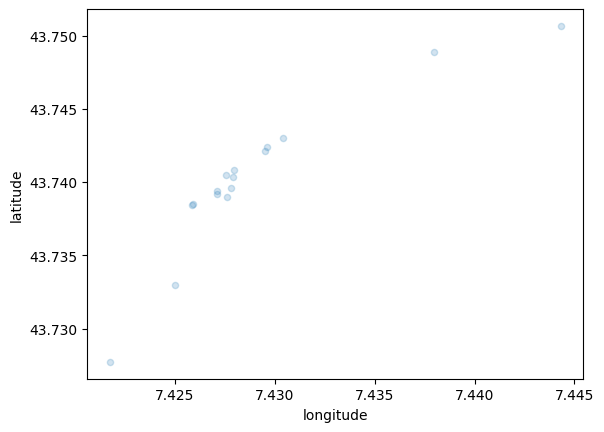

In [6]:
monaco.plot(kind='scatter', x='longitude', y='latitude', alpha=0.2)

----
&nbsp;
### Amendments to the address and location formatting

In [7]:
# Check for addresses without a comma or with more than 3 commas (indicating more than 4 fields)
incorrect_format = monaco[~monaco['address'].str.count(',').isin([1, 2, 3])]

In [8]:
# Print out number addresses that don't match the expected format
if not incorrect_format.empty:
    print(f"Addresses with unexpected format: {len(incorrect_format['address'])}")

Addresses with unexpected format: 5


In [9]:
def process_address(addr):
    # Split the address by commas and strip whitespace
    parts = [part.strip() for part in addr.split(',')]

    # If there are not enough parts, just return the original
    if len(parts) < 4:
        return addr, None, None

    # Extract the postal code and city
    postal_code = parts[-2]
    location = parts[-3]

    # Form the main address by joining the remaining parts (excluding postal code, city, and country)
    main_address = ', '.join(parts[:-3])

    return main_address, location, postal_code

In [10]:
# Apply the function to the DataFrame
addresses, locations, postal_codes = zip(*monaco['address'].apply(process_address))

monaco['address'] = addresses
monaco['location'] = [f"{location}, {postal_code}" for location, postal_code in zip(locations, postal_codes)]
monaco['arrondissement'] = 'Monaco'
monaco['department_num'] = '98'
monaco['department'] = 'Monaco'
monaco['capital'] = 'Monaco'
monaco['region'] = "Provence-Alpes-Côte d'Azur"

In [11]:
monaco = monaco[['name', 'address', 'location', 'arrondissement', 'department_num', 'department', 'capital', 'region', 'price', 'cuisine', 'url', 'award', 'greenstar', 'stars', 'longitude', 'latitude']]
monaco.head()

,name,address,location,arrondissement,department_num,department,capital,region,price,cuisine,url,award,greenstar,stars,longitude,latitude
0,Le Louis XV - Alain Ducasse à l'Hôtel de Paris,Place du Casino,"Monaco, 98000",Monaco,98,Monaco,Monaco,Provence-Alpes-Côte d'Azur,€€€€,"Mediterranean Cuisine, Modern Cuisine",https://www.ducasse-paris.com/,3 Stars,0,3.0,7.427105,43.739184
1,L'Abysse Monte-Carlo,Square Beaumarchais,"Monaco, 98000",Monaco,98,Monaco,Monaco,Provence-Alpes-Côte d'Azur,€€€€,Japanese,https://www.montecarlosbm.com/fr/restaurant/la...,2 Stars,0,2.0,7.425928,43.738489
2,Blue Bay Marcel Ravin,40 avenue Princesse-Grace,"Monaco, 98000",Monaco,98,Monaco,Monaco,Provence-Alpes-Côte d'Azur,€€€€,Creative,https://www.montecarlosbm.com/fr/restaurant-mo...,2 Stars,0,2.0,7.437975,43.748897
3,Les Ambassadeurs by Christophe Cussac,"Hôtel Métropole Monte-Carlo, 4 avenue de la Ma...","Monaco, 98000",Monaco,98,Monaco,Monaco,Provence-Alpes-Côte d'Azur,€€€€,"Modern Cuisine, Mediterranean Cuisine",http://www.metropole.com/fr/restaurant-montecarlo,2 Stars,0,2.0,7.427562,43.740506
4,"Pavyllon, un restaurant de Yannick Alléno, Mon...",Square Beaumarchais,"Monaco, 98000",Monaco,98,Monaco,Monaco,Provence-Alpes-Côte d'Azur,€€€€,"Modern Cuisine, Creative",https://www.montecarlosbm.com/fr/restaurant-mo...,1 Star,0,1.0,7.425868,43.738462


In [12]:
monaco['department_num'] = monaco['department_num'].astype(str)
monaco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            16 non-null     object 
 1   address         16 non-null     object 
 2   location        16 non-null     object 
 3   arrondissement  16 non-null     object 
 4   department_num  16 non-null     object 
 5   department      16 non-null     object 
 6   capital         16 non-null     object 
 7   region          16 non-null     object 
 8   price           16 non-null     object 
 9   cuisine         16 non-null     object 
 10  url             16 non-null     object 
 11  award           16 non-null     object 
 12  greenstar       16 non-null     int64  
 13  stars           16 non-null     float64
 14  longitude       16 non-null     float64
 15  latitude        16 non-null     float64
dtypes: float64(3), int64(1), object(12)
memory usage: 2.1+ KB


We export `monaco` as `monaco_restaurants.csv`

In [13]:
# Export the DataFrame to a .csv file
monaco.to_csv('../../data/France/monaco_restaurants.csv', index=False)

----
&nbsp;
### Grouping restaurants based on the number of Michelin stars.

In [14]:
# We create a copy
monaco_copy = monaco.copy()

# Create dummy variables for each category of 'star'
monaco_copy['green_stars'] = monaco_copy['greenstar'].apply(lambda x: 1 if x == 1 else 0)
monaco_copy['selected'] = monaco_copy['stars'].apply(lambda x: 1 if x == 0.25 else 0)
monaco_copy['bib_gourmand'] = monaco_copy['stars'].apply(lambda x: 1 if x == 0.5 else 0)
monaco_copy['1_star'] = monaco_copy['stars'].apply(lambda x: 1 if x == 1.0 else 0)
monaco_copy['2_star'] = monaco_copy['stars'].apply(lambda x: 1 if x == 2.0 else 0)
monaco_copy['3_star'] = monaco_copy['stars'].apply(lambda x: 1 if x == 3.0 else 0)

In [15]:
# Group by 'department' and sum 'bibs', '1_star', '2_star' and '3_star'
monaco_grouped = monaco_copy.groupby(['department_num', 'department'])[['green_stars', 'selected', 'bib_gourmand', '1_star', '2_star', '3_star']].sum()

In [16]:
# Create a 'total_ stars' column - sum of stars
# Individual stars are summed here. ie, If 2 star then stars = 2
monaco_grouped['total_stars'] = monaco_grouped['1_star']*1 + monaco_grouped['2_star']*2 + monaco_grouped['3_star']*3

# Create a 'starred_restaurants' column = sum of starred restaurants
monaco_grouped['starred_restaurants'] =  monaco_grouped['1_star'] + monaco_grouped['2_star'] + monaco_grouped['3_star']

monaco_grouped['capital'] = 'Monaco'
monaco_grouped['region'] = "Provence-Alpes-Côte d'Azur"
print(f"Columns: {monaco_grouped.columns.tolist()}")

Columns: ['green_stars', 'selected', 'bib_gourmand', '1_star', '2_star', '3_star', 'total_stars', 'starred_restaurants', 'capital', 'region']


In [17]:
# Reset index to turn 'department_num' and 'department' back into columns
monaco_grouped = monaco_grouped.reset_index()

# Add required demographic columns with placeholder 0.0 values
demographic_cols = [
    'GDP_millions(€)', 'GDP_per_capita(€)', 'poverty_rate(%)',
    'average_annual_unemployment_rate(%)', 'average_net_hourly_wage(€)',
    'municipal_population', 'population_density(inhabitants/sq_km)',
    'area(sq_km)'
]

for col in demographic_cols:
    monaco_grouped[col] = 0.0

# Reorder columns to match departmental_data
monaco_grouped = monaco_grouped[[
    'department_num', 'department', 'capital', 'region', 'selected',
    'bib_gourmand', '1_star', '2_star', '3_star', 'total_stars',
    'starred_restaurants', 'green_stars',
    'GDP_millions(€)', 'GDP_per_capita(€)', 'poverty_rate(%)',
    'average_annual_unemployment_rate(%)', 'average_net_hourly_wage(€)',
    'municipal_population', 'population_density(inhabitants/sq_km)',
    'area(sq_km)'
]]

monaco_grouped.head()

,department_num,department,capital,region,selected,bib_gourmand,1_star,2_star,3_star,total_stars,starred_restaurants,green_stars,GDP_millions(€),GDP_per_capita(€),poverty_rate(%),average_annual_unemployment_rate(%),average_net_hourly_wage(€),municipal_population,population_density(inhabitants/sq_km),area(sq_km)
0,98,Monaco,Monaco,Provence-Alpes-Côte d'Azur,8,0,4,3,1,13,8,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
monaco_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   department_num                         1 non-null      object 
 1   department                             1 non-null      object 
 2   capital                                1 non-null      object 
 3   region                                 1 non-null      object 
 4   selected                               1 non-null      int64  
 5   bib_gourmand                           1 non-null      int64  
 6   1_star                                 1 non-null      int64  
 7   2_star                                 1 non-null      int64  
 8   3_star                                 1 non-null      int64  
 9   total_stars                            1 non-null      int64  
 10  starred_restaurants                    1 non-null      int64  
 11  green_star

----
&nbsp;
### Adding individual restaurants

In [19]:
# Create a separate DataFrame with star ratings, department, and coordinates
location_data_monaco = monaco[['stars', 'department_num', 'latitude', 'longitude']]

# Convert to a dictionary where keys are tuples of star rating and department
location_dict_monaco = (
    location_data_monaco
    .groupby(['stars', 'department_num'])[['latitude', 'longitude']]
    .apply(lambda df: list(zip(df.latitude, df.longitude)))
    .to_dict()
)

In [20]:
# Create a mapping from star values to string labels
star_label_mapping = {
    0.25: 'Selected',
    0.5: 'Bib',
    1: '1',
    2: '2',
    3: '3'
}

# Create a function to map these dictionaries to original DataFrame for departments
def map_locations_department(row):
    return {star_label_mapping[stars]: location_dict_monaco.get((stars, row['department_num'])) for stars in [0.25, 0.5, 1, 2, 3]}

In [21]:
# Apply this function to create a new 'locations' column
monaco_grouped['locations'] = monaco_grouped.apply(map_locations_department, axis=1)
monaco_grouped.head()

,department_num,department,capital,region,selected,bib_gourmand,1_star,2_star,3_star,total_stars,...,green_stars,GDP_millions(€),GDP_per_capita(€),poverty_rate(%),average_annual_unemployment_rate(%),average_net_hourly_wage(€),municipal_population,population_density(inhabitants/sq_km),area(sq_km),locations
0,98,Monaco,Monaco,Provence-Alpes-Côte d'Azur,8,0,4,3,1,13,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'Selected': [(43.7423995, 7.4295871), (43.732..."


----
&nbsp;
### Merging with geoJSON data

In [22]:
gdf_monaco = gpd.read_file('../../../../ExtraData/Geodata/monaco.geojson')
gdf_monaco.head()

,crossing,highway,historic,natural,boundary,name:lt,admin_level,name,source,border_type,geometry
0,None,None,None,coastline,administrative,Prancūzija — Monakas,2,France - Monaco,cadastre-dgi-fr source : Direction Générale de...,nation,"POLYGON ((7.42244 43.72954, 7.42258 43.72947, ..."


In [23]:
# Add the geometry column from gdf_monaco
monaco_grouped['geometry'] = gdf_monaco.geometry.values[0]

# Move geometry to second column
cols = monaco_grouped.columns.tolist()
cols.insert(1, cols.pop(cols.index('geometry')))
monaco_grouped = monaco_grouped[cols]

# Rename 'department_num' to 'code'
monaco_grouped = monaco_grouped.rename(columns={'department_num': 'code'})

# Convert to GeoDataFrame and set CRS (assuming WGS84 from original GeoJSON)
monaco_geo = gpd.GeoDataFrame(monaco_grouped, geometry='geometry', crs=gdf_monaco.crs)

# Preview
monaco_geo.head()

,code,geometry,department,capital,region,selected,bib_gourmand,1_star,2_star,3_star,...,green_stars,GDP_millions(€),GDP_per_capita(€),poverty_rate(%),average_annual_unemployment_rate(%),average_net_hourly_wage(€),municipal_population,population_density(inhabitants/sq_km),area(sq_km),locations
0,98,"POLYGON ((7.42244 43.72954, 7.42258 43.72947, ...",Monaco,Monaco,Provence-Alpes-Côte d'Azur,8,0,4,3,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'Selected': [(43.7423995, 7.4295871), (43.732..."


In [24]:
monaco_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   code                                   1 non-null      object  
 1   geometry                               1 non-null      geometry
 2   department                             1 non-null      object  
 3   capital                                1 non-null      object  
 4   region                                 1 non-null      object  
 5   selected                               1 non-null      int64   
 6   bib_gourmand                           1 non-null      int64   
 7   1_star                                 1 non-null      int64   
 8   2_star                                 1 non-null      int64   
 9   3_star                                 1 non-null      int64   
 10  total_stars                            1 non-null      int

In [25]:
# Export the GeoDataFrame to a .geojson file
monaco_geo.to_file('../../data/France/geodata/monaco_restaurants.geojson', driver='GeoJSON')